In [1]:
from ipynb.fs.full.GraphSubmodular import generateData, getMatrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

{'qiskit-terra': '0.24.1', 'qiskit-aer': '0.12.1', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit': '0.43.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}


In [2]:
### Linear, Periodic, Complete 
def getL(n):
    edges = [(i,i+1) for i in range(0,n-1)]
    return getMatrix(edges,n)

def getP(n):
    edges = [(i,(i+1)%n) for i in range(0,n)]
    return getMatrix(edges,n)

def getK(n): 
    return np.ones((n,n))-np.identity(n)

In [3]:
###Compute the relative errors at the respective transition values (K_n)
CompleteGraphErrors=[]
for n in range (4,21):
    exact = generateData(getK(n),[(n-1)/2])[2][0]
    computed = generateData(getK(n),[(n-1)/2])[1][0]
    CompleteGraphErrors.append(100*abs((exact-computed)/exact))
    print(str(n)+" Qubits Complete")

4 Qubits Complete
5 Qubits Complete
6 Qubits Complete
7 Qubits Complete
8 Qubits Complete
9 Qubits Complete
10 Qubits Complete
11 Qubits Complete
12 Qubits Complete
13 Qubits Complete
14 Qubits Complete
15 Qubits Complete
16 Qubits Complete
17 Qubits Complete
18 Qubits Complete
19 Qubits Complete
20 Qubits Complete


In [4]:
###Compute the relative errors at the respective transition values (L_n)
LGraphErrors=[]
for n in range (4,21):
    exact = generateData(getL(n),[(n-1)/n])[2][0]
    computed = generateData(getL(n),[(n-1)/n])[1][0]
    LGraphErrors.append(100*abs((exact-computed)/exact))
    print(str(n)+" Qubits Complete")

4 Qubits Complete
5 Qubits Complete
6 Qubits Complete
7 Qubits Complete
8 Qubits Complete
9 Qubits Complete
10 Qubits Complete
11 Qubits Complete
12 Qubits Complete
13 Qubits Complete
14 Qubits Complete
15 Qubits Complete
16 Qubits Complete
17 Qubits Complete
18 Qubits Complete
19 Qubits Complete
20 Qubits Complete


In [5]:
###Compute the relative errors at the respective transition values (P_n)
PGraphErrors=[]
for n in range (4,21):
    exact = generateData(getP(n),[1])[2][0]
    computed = generateData(getP(n),[1])[1][0]
    PGraphErrors.append(100*abs((exact-computed)/exact))
    print(str(n)+" Qubits Complete")

4 Qubits Complete
5 Qubits Complete
6 Qubits Complete
7 Qubits Complete
8 Qubits Complete
9 Qubits Complete
10 Qubits Complete
11 Qubits Complete
12 Qubits Complete
13 Qubits Complete
14 Qubits Complete
15 Qubits Complete
16 Qubits Complete
17 Qubits Complete
18 Qubits Complete
19 Qubits Complete
20 Qubits Complete


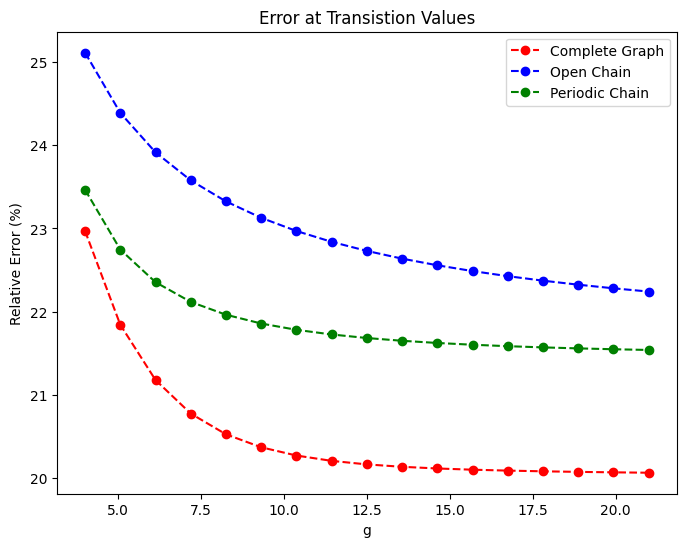

In [26]:
plt.figure(figsize=(8,6))

plt.plot(np.linspace(4,21,17),CompleteGraphErrors,'r--o',label='Complete Graph')
plt.plot(np.linspace(4,21,17),LGraphErrors,'b--o',label='Open Chain')
plt.plot(np.linspace(4,21,17),PGraphErrors,'g--o',label='Periodic Chain')
plt.xlabel('g')
plt.ylabel('Relative Error (%)')
plt.title("Error at Transistion Values")
plt.legend()
plt.savefig("LPKError")
plt.show()

Graph 1: Linear Chain
-------------
Graph 2 Linear Chain
-------------
Graph 1: Periodic Chain
-------------
Graph 2 Periodic Chain
-------------
Graph 1: Fully Connected Graph
-------------
Graph 2 Fully Connected Graph
-------------


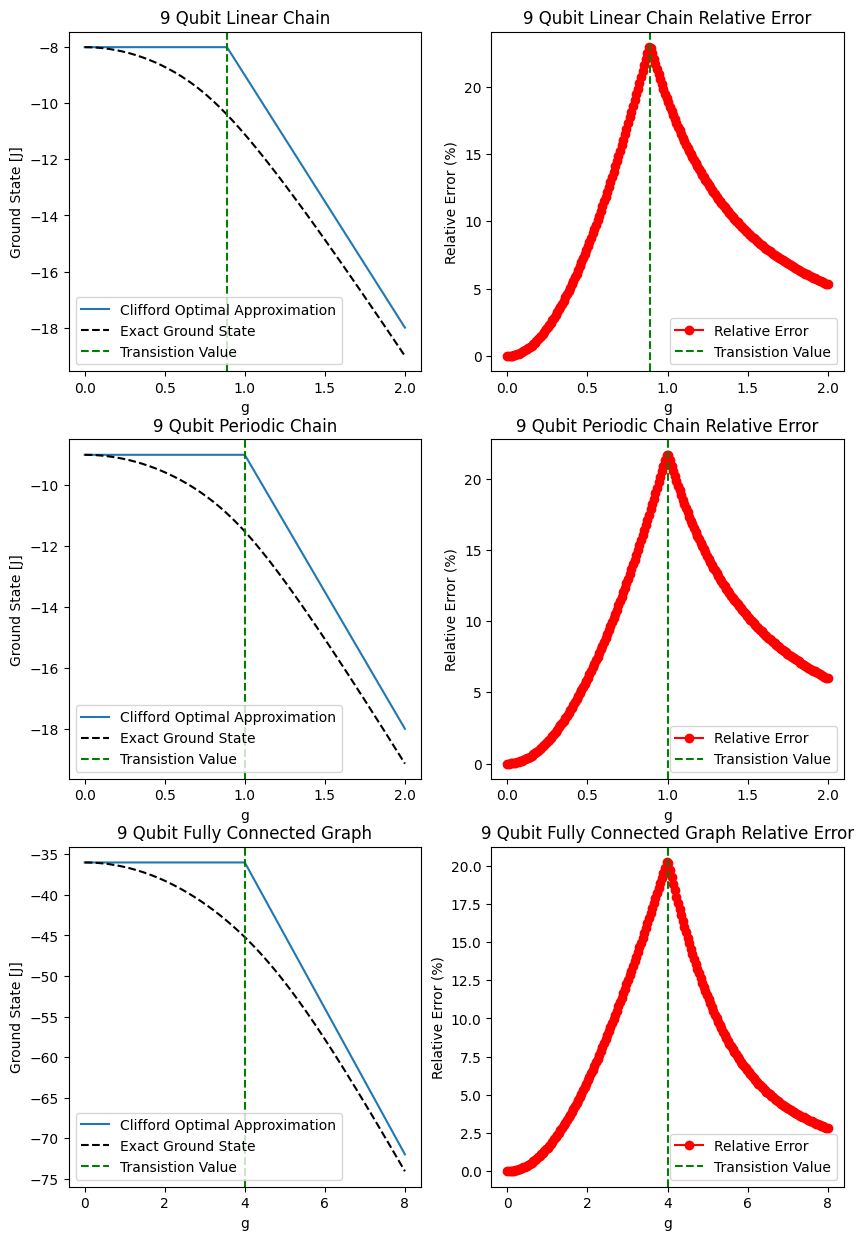

In [7]:

fig, ax = plt.subplots(3,2,figsize=(10, 15))
n=9
l = [getL, getP, getK]
names = ["Linear Chain", "Periodic Chain", "Fully Connected Graph"]
bounds=[2,2,8]
transitions=[8/9,1,4]
for i in range(3):
    print("Graph 1: "+names[i])
    computed, circuits, exact, _ = generateData(l[i](n),np.linspace(0,bounds[i],200))
    clifford_data = circuits
    exact_data = exact
    ax[i][0].plot(np.linspace(0,bounds[i],200),circuits,label="Clifford Optimal Approximation")
    ax[i][0].plot(np.linspace(0,bounds[i],200),exact,'k--',label="Exact Ground State")
    ax[i][0].set(xlabel='g',
    ylabel='Ground State [J]',
    title=str(n)+" Qubit "+names[i])
    ax[i][0].axvline(x=transitions[i],color='g',linestyle = 'dashed',label='Transistion Value')
    ax[i][0].legend(loc='lower left')
    print("-------------")
    clifford_data = np.array(clifford_data)
    exact_data = np.array(exact_data)
    print("Graph 2 "+names[i])
    ax[i][1].plot(np.linspace(0,bounds[i],200),100*abs((clifford_data-exact_data)/exact_data),'r-o',label="Relative Error")
    ax[i][1].set(xlabel='g',
    ylabel='Relative Error (%)',
    title=str(n)+" Qubit "+names[i]+" Relative Error")
    ax[i][1].axvline(x=transitions[i],color='g',linestyle = 'dashed',label='Transistion Value')
    ax[i][1].legend(loc='lower right')
    print("-------------")

plt.savefig("LPK")
plt.show()